In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import spatial
import scipy.stats

In [4]:
# Function to find the mode in a given array using a dictionary to count their frequency.
def mode(array: list) -> int:
    freq = dict()  
    for i in array:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    
    return max(freq, key=freq.get) # return key based on the highest value (k:v pair)



# Calculates relevant summary statistics for a given array
def summary_stats(array: list) -> int:
    mean = np.mean(array)	
    median = np.median(array)
    mode_arr = mode(array)
    
    min_arr = min(array)
    max_arr = max(array)
    quartiles = np.percentile(array, [25, 75]) # finds 1st and 3rd quartile of the array, 25% and 75% respectively.

    print(f'mean: {mean}\nmedian: {median}\nmode: {mode_arr}\n')
    print(f'lower quartile: {quartiles[0]}\nupper quartile: {quartiles[1]}\nmin: {min_arr}\nmax: {max_arr}\n')



# Finds outliers in an array based on 1.5 * IQR rule
def find_outliers(array: list):
    quartiles = np.percentile(array, [25, 75])	# get 1st and 3rd quartile for calculations
    iqr = (quartiles[1] - quartiles[0])	# IQR = 3rd Quartile - 1st Quartile
  	
    lower = quartiles[0] - iqr # lowest value before it could be considered an outlier
    upper = quartiles[1] + iqr # highest value before it becomes an outlier

    outliers = [elem for elem in array if elem < lower or elem > upper] # find all (elements < lower) or (elements > upper)
    print(outliers)



# Function to compare similarities between two entries, based on binary attributes
def find_binary_similarity(df: pd.DataFrame, col1, col2):
    new_df = pd.DataFrame([df[col1], df[col2]]).transpose()	# Transpose to traverse easier

    cnt = 0	# count of similarities
    for rows in new_df.index:
        if new_df[col1][rows] == new_df[col2][rows]: # check if they have a matching attribute
            cnt += 1

    print(new_df, '\n') 
    print(f'Similarity between {col1} and {col2}: {cnt / len(new_df.index)}\n')



# Normalize data in a given array using its min & max values
def normalization(array: list):
    lower = max(array) - min(array)
    arr_min = min(array)
    ret = []
    for i in array:
        ret += [(i - arr_min) / lower]

    print(ret)

In [5]:
age = [46,25,27,27,28,36,53,27,18,25]
summary_stats(age)

mean: 31.2
median: 27.0
mode: 27

lower quartile: 25.5
upper quartile: 34.0
min: 18
max: 53



In [6]:
temp = [52.3,56.6,64.6,72.5,79.9,86.4,89.1,88.1,82.2,72.7,63.6,54.0]
summary_stats(temp)
find_outliers(temp)

mean: 71.83333333333334
median: 72.6
mode: 52.3

lower quartile: 61.85
upper quartile: 83.25
min: 52.3
max: 89.1

21.4
[]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa58d1bf730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa58d1bfd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa58d1bf460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa58d1c32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa58d1c3580>],
 'means': []}

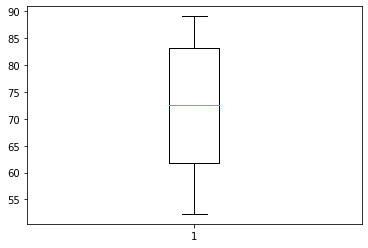

In [7]:
plt.boxplot(temp)

In [9]:
customers = [
["Customer","David","Susan","Lisa"], 
["Profession","Manager","Manager","Programmer"], 
["Education","B.Sc.","B.Sc.","M.Sc."], 
["Hobbies","Golf","Swimming","Swimming"], 
]

customers = pd.DataFrame(customers, columns=customers[0])
customers = customers.drop([0])
customers.set_index(customers.columns[0], inplace=True)

find_binary_similarity(customers, "David", "Susan")
find_binary_similarity(customers, "Susan", "Lisa")

              David     Susan
Customer                     
Profession  Manager   Manager
Education     B.Sc.     B.Sc.
Hobbies        Golf  Swimming 

Similarity between David and Susan: 0.6666666666666666

               Susan        Lisa
Customer                        
Profession   Manager  Programmer
Education      B.Sc.       M.Sc.
Hobbies     Swimming    Swimming 

Similarity between Susan and Lisa: 0.3333333333333333



In [10]:
patients = [
    ["Patient","Tom","Mat","Lucy"],
    ["Fever","Yes","No","Yes"],
    ["Cough","No","Yes","Yes"],
    ["Sleepy","Yes","No","No"],
    ["Headache","Yes","Yes","No"],
    ["Running nose","Yes","Yes","No"],
    ["Fatigue","Yes","Yes","Yes"],
    ["Sweaty","Yes","No","Yes"],
    ["Dizziness","Yes","Yes","Yes"],
    ]

patients = pd.DataFrame(patients, columns=patients[0])
patients.drop([0], inplace=True)
patients.set_index(patients.columns[0], inplace=True)

find_binary_similarity(patients, "Tom", "Mat")
find_binary_similarity(patients, "Mat", "Lucy")

              Tom  Mat
Patient               
Fever         Yes   No
Cough          No  Yes
Sleepy        Yes   No
Headache      Yes  Yes
Running nose  Yes  Yes
Fatigue       Yes  Yes
Sweaty        Yes   No
Dizziness     Yes  Yes 

Similarity between Tom and Mat: 0.5

              Mat Lucy
Patient               
Fever          No  Yes
Cough         Yes  Yes
Sleepy         No   No
Headache      Yes   No
Running nose  Yes   No
Fatigue       Yes  Yes
Sweaty         No  Yes
Dizziness     Yes  Yes 

Similarity between Mat and Lucy: 0.5



In [11]:
flowers = [
    ["Flower","A","B","C"],
    ["Sepal Length",5.1,7.0,4.8],
    ["Sepal Width",3.5,3.2,3.4],
    ["Petal Length",1.4,4.7,1.9],
    ["Petal Width",0.2,1.4,0.2],
    ]
flowers = pd.DataFrame(flowers, columns=[flowers[0]])
flowers.drop([0], inplace=True)
flowers.set_index(flowers.columns[0], inplace=True)
flowers = flowers.T
attributes = ["Sepal Length", "Sepal Width", 'Petal Length', 'Petal Width']

x = flowers.loc['A'].values[0]
y = flowers.loc['B'].values[0]
z = flowers.loc['C'].values[0]

arr1 = [i for i in x]
arr2 = [i for i in y]
arr3 = [i for i in z]

print(scipy.stats.pearsonr(arr1, arr2), '\n')
print(scipy.stats.pearsonr(arr2, arr3))


(0.7865910725616965, 0.21340892743830353) 

(0.8331186986778341, 0.16688130132216594)


In [12]:
loan_info = [    
    ["Customer","Kevin","John","Daniel"],
    ["Credit Score Range",5/5, 4/5, 3/5],
    ["Salary Range", 3/4, 4/4, 2/4],
    ["Age", 3/3, 2/3, 1/3],
]

loan_info = pd.DataFrame(loan_info, columns=[loan_info[0]])
loan_info.drop([0], inplace=True)
loan_info.set_index(loan_info.columns[0], inplace=True)

res_kj = 1 - spatial.distance.cosine(loan_info['Kevin'], loan_info['John'])
res_dj = 1 - spatial.distance.cosine(loan_info['Daniel'], loan_info['John'])

print(f"Kevin & John: {res_kj}")
print(f"Daniel & John: {res_dj}")

Kevin & John: 0.9591207598431705
Daniel & John: 0.9805923376571336


In [14]:
list1 = [5.7, 6.2, 5.1, 6.4]
normalization(list1)

[0.4615384615384617, 0.8461538461538461, 0.0, 1.0]
